# Visualizations poster and paper

In [9]:
import numpy as np
import pandas as pd
import pyreadr as pyr
from sys import getsizeof
import random
import cv2
import os
import fiona
from skimage import io
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import contextily as ctx
from shapely.geometry import Point

In [ ]:
#set up dir

dir_h = "YOUR_DIRECTORY/"
dir_rs = "YOUR_DIRECTORY/"

## Plot location respondents in highly urban sample

In [ ]:
shp21 = pd.read_pickle(dir_h + "shp_stat_analysis.pkl")
shp21 = shp21.assign(children_u5_dummy = np.where(shp21.n_children_u5 >=1, 1, 0))
shp21 = shp21.assign(children_17_5_dummy = np.where(shp21.n_children_17_5 >=1, 1, 0))
shp21 = shp21.assign(children_o17_dummy = np.where(shp21.n_children_o17 >=1, 1, 0))

shp21 = shp21[(shp21.pop_density >= 1500) & (shp21.age.notnull()) & (shp21.civstat.notnull()) & (shp21.educat.notnull()) & (shp21.occupa.notnull()) &
              (shp21.hh_eq_income_log.notnull()) & (shp21.children_u5_dummy.notnull()) & (shp21.children_17_5_dummy.notnull()) & 
              (shp21.children_o17_dummy.notnull()) & (shp21.owner.notnull()) & (shp21.residence_type.notnull()) &
               (shp21.CH_region.notnull()) & (shp21.pop_density.notnull()) & (shp21.distance_to_center_2.notnull()) & (shp21.lifesat.notnull())]
shp21 = shp21.assign(n_obs = shp21.groupby("center_name").idpers.transform(len))
name, count_ = np.unique(shp21[(shp21.pop_density>=1500)].center_name, return_counts=True)
print(count_.mean())
print(name, count_)
shp21 = shp21.groupby("center_name").first().reset_index()

48.35087719298246
['Aarau' 'Aarburg' 'Adliswil' 'Annemasse' 'Baden' 'Basel' 'Bern'
 'Biel/Bienne' 'Brugg' 'Cham' 'Chiasso' 'Dietikon' 'Freienbach' 'Fribourg'
 'Genève' 'Gerlafingen' 'Giubiasco' 'Heerbrugg' 'Horgen' 'Kilchberg ZH'
 'Kreuzlingen' 'Lachen SZ' 'Lausanne' 'Locarno' 'Lugano' 'Luzern'
 'Neuchâtel' 'Neuenhof' 'Nyon' 'Oberentfelden' 'Olten' 'Regensdorf'
 'Rüti ZH' 'Rütihof' 'Schaffhausen' 'Schwerzenbach' 'Sierre' 'Sion'
 'Solothurn' 'St. Gallen' 'Stabio' 'Steinhausen' 'Sursee' 'Thalwil' 'Thun'
 'Turgi' 'Uster' 'Uzwil' 'Vevey' 'Wettingen' 'Wetzikon ZH' 'Wil SG'
 'Windisch' 'Winterthur' 'Wohlen AG' 'Zumikon' 'Zürich'] [ 51   4   7   7  22 256 241  62  25   3  21  21  14  62 320   5  19  14
  18   7  14  16 207   9  63 170  14   3  12   2  38   2   8   2   3  34
   2  34  29  65   2   5  17  20  47   6  41   3  31  33   6  31   5 112
  10   3 478]


In [ ]:
shp21[["center_name", "n_obs"]]

#### WGS84 to coordinates

In [10]:
shp21_geo = shp21.copy()

geometry = [Point(xy) for xy in zip(shp21_geo.g_lon, shp21_geo.g_lat)]

crs = {'init': 'EPSG:4326'}
shp21_geo = gpd.GeoDataFrame(shp21_geo, crs=crs, geometry=geometry)

C:\Users\bahr\Anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Axes: >

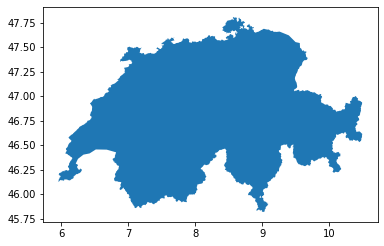

In [11]:
CH_shp = gpd.read_file(dir_h + "switzerland_map/swissBOUNDARIES3D_1_4_TLM_LANDESGEBIET.shp")
CH_shp = CH_shp.to_crs("EPSG:4326")
CH_shp = CH_shp[["NAME", "geometry"]]
CH_shp = CH_shp[CH_shp.NAME=="Schweiz"]
CH_shp.plot()

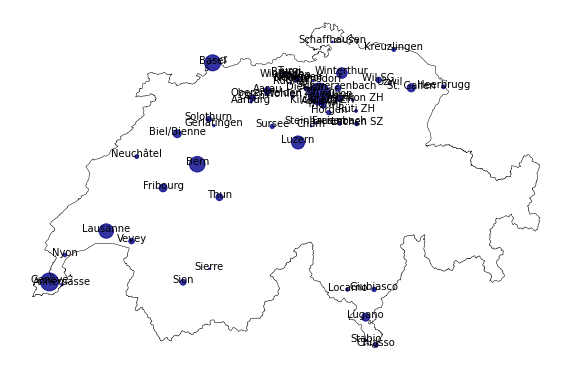

In [12]:
ax = CH_shp.boundary.plot(figsize=(10,15), color="black", linewidth=0.5)
shp21_geo.plot(ax=ax, marker='o', color='darkblue', markersize="n_obs", alpha=0.8)
shp21_geo.apply(lambda x: ax.annotate(text=x.center_name, xy=x.geometry.centroid.coords[0], ha='center', color = "black"), axis=1)
plt.axis("off")
plt.show()

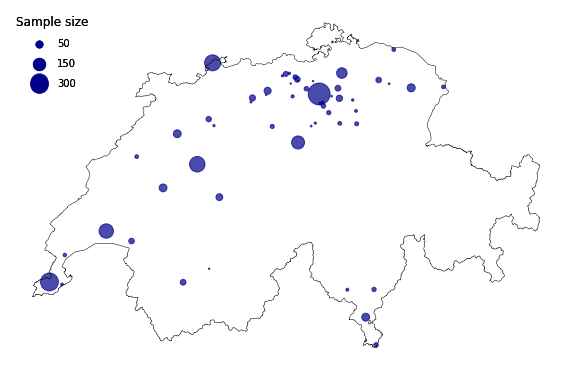

In [8]:
ax = CH_shp.boundary.plot(figsize=(10,15), color="black", linewidth=0.5)
shp21_geo.plot(ax=ax, marker='o', color='darkblue', markersize="n_obs", alpha=0.7)
for area in [50, 150, 300]:
    ax.scatter([6.01], [47.4428], c='darkblue', alpha=0.9, s=area*1.0, # [6.0], [47.445]
                label=str(area))
legend1 = ax.legend(scatterpoints=1, frameon=False,
        labelspacing=1, loc='upper left', fontsize=10, 
        title="Sample size",
        title_fontsize=12)
ax.add_artist(legend1)
plt.axis("off")


#plt.savefig(dir_h + "visualization/Switzerland_sample_map.png", dpi=800, facecolor="white", bbox_inches="tight")
plt.show()

## Example image for Geneva

In [96]:
dir_ = dir_rs + "CH_images/img_crop/imgcrop_51_"
imgs = []
for i in range(1,10):    
    imgs.append(io.imread(dir_+str(i)+".png"))

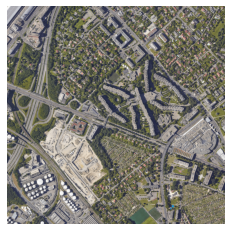

In [ ]:
img1 = np.hstack(np.asarray(imgs)[:3])
img2 = np.hstack(np.asarray(imgs)[3:6])
img3 = np.hstack(np.asarray(imgs)[6:10])
img_51 = np.vstack([img1, img2, img3])
plt.imshow(img_51)
plt.axis("off")
#plt.savefig(dir_h + "visualization/neighborhood_hh_51.png", dpi=800, facecolor="white", bbox_inches="tight")
plt.show()

## Effect size figures

### 1260m buffer

### Trees in garden and parks and age

In [ ]:
trees_garden_parks = pd.DataFrame({"mean": [0.016767113, -0.04524906, 0.031751364, 0.136986463],
                                  "SE": [0.04943352, 0.06537509, 0.03631664, 0.03838231],
                                 "age": ["20-29", "30-49", "50-65", "65+"],
                                 "variable": ["trees_garden_parks", "trees_garden_parks", "trees_garden_parks", "trees_garden_parks"]})
trees_garden_parks

### Grass fields in garden and parks and age

In [ ]:
meadows_garden_parks = pd.DataFrame({"mean": [-0.025167449, -0.028890677, 0.05098116, 0.23999207],
                                  "SE": [0.06425754, 0.07836081, 0.05338980, 0.06752942],
                                 "age": ["20-29", "30-49", "50-65", "65+"],
                                 "variable": ["meadows_garden_parks", "meadows_garden_parks", "meadows_garden_parks", "meadows_garden_parks"]})
meadows_garden_parks

### Grass fields on playgrounds and age

In [ ]:
meadows_playgrounds = pd.DataFrame({"mean": [0.077779857, -0.043320894, 0.03696288, -0.12790465],
                                  "SE": [0.07178241, 0.05246323, 0.04502431, 0.05616414],
                                 "age": ["20-29", "30-49", "50-65", "65+"],
                                 "variable": ["meadows_playgrounds", "meadows_playgrounds", "meadows_playgrounds", "meadows_playgrounds"]})
meadows_playgrounds

### Undefined grass fields and age

In [ ]:
meadows_other = pd.DataFrame({"mean": [-0.200361697, -0.037789887, -0.01146650, 0.10402345],
                                  "SE": [0.07938074, 0.06866992, 0.05032170, 0.06431315],
                                 "age": ["20-29", "30-49", "50-65", "65+"],
                                 "variable": ["meadows_other", "meadows_other", "meadows_other", "meadows_other"]})
meadows_other

### Figure 3

In [ ]:
x = [0.0, 1.0, 2.0, 3.0]

fig, axes = plt.subplots(2, 2, figsize=(10,10))
sns.set_style("dark")
# trees garden parks
axes[0, 0].hlines(0.0, -1.0, 4.0, color="darkred", linestyles="dashed", linewidth=1)
axes[0, 0].errorbar(x=x, y=trees_garden_parks["mean"], yerr=trees_garden_parks["SE"]*1.96,
            fmt='none', ecolor='black', elinewidth=1, capsize=5, alpha=0.5)
sns.pointplot(ax=axes[0, 0], data=trees_garden_parks, x="age", y="mean", hue="age", linestyle="none", marker="D",
              markersize=10, palette=["lightskyblue", "dodgerblue", "royalblue", "mediumblue"])
for i, txt in enumerate(trees_garden_parks["mean"]):
    axes[0, 0].annotate('{:.3f}'.format(round(txt, 3)), (i + 0.08 , txt + 0.01), fontsize=9)
axes[0, 0].set_title("Trees garden & park", fontsize=15)
axes[0, 0].set_ylabel("")
axes[0, 0].set_ylim(-0.40, 0.40)
axes[0, 0].set_xlabel("")
axes[0, 0].tick_params(labelsize=10)

# grass garden parks
axes[0, 1].hlines(0.0, -1.0, 4.0, color="darkred", linestyles="dashed", linewidth=1)
axes[0, 1].errorbar(x=x, y=meadows_garden_parks["mean"], yerr=meadows_garden_parks["SE"]*1.96,
            fmt='none', ecolor='black', elinewidth=1, capsize=5, alpha=0.5)
sns.pointplot(ax=axes[0, 1], data=meadows_garden_parks, x="age", y="mean", hue="age", linestyle="none", marker="D",
              markersize=10, palette=["lightskyblue", "dodgerblue", "royalblue", "mediumblue"])
for i, txt in enumerate(meadows_garden_parks["mean"]):
    axes[0, 1].annotate('{:.3f}'.format(round(txt, 3)), (i + 0.08 , txt + 0.01), fontsize=9)
axes[0, 1].set_title("Grass garden & park", fontsize=15)
axes[0, 1].set_ylabel("")
axes[0, 1].set_ylim(-0.40, 0.40)
axes[0, 1].set_xlabel("")
axes[0, 1].tick_params(labelsize=10)

# grass playground
axes[1, 0].hlines(0.0, -1.0, 4.0, color="darkred", linestyles="dashed", linewidth=1)
axes[1, 0].errorbar(x=x, y=meadows_playgrounds["mean"], yerr=meadows_playgrounds["SE"]*1.96,
            fmt='none', ecolor='black', elinewidth=1, capsize=5, alpha=0.5)
sns.pointplot(ax=axes[1, 0], data=meadows_playgrounds, x="age", y="mean", hue="age", linestyle="none", marker="D",
              markersize=10, palette=["lightskyblue", "dodgerblue", "royalblue", "mediumblue"])
for i, txt in enumerate(meadows_playgrounds["mean"]):
    axes[1, 0].annotate('{:.3f}'.format(round(txt, 3)), (i + 0.08 , txt + 0.01), fontsize=9)
axes[1, 0].set_title("Grass playground", fontsize=15)
axes[1, 0].set_ylabel("")
axes[1, 0].set_ylim(-0.40, 0.40)
axes[1, 0].set_xlabel("")
axes[1, 0].tick_params(labelsize=10)

# grass other
axes[1, 1].hlines(0.0, -1.0, 4.0, color="darkred", linestyles="dashed", linewidth=1)
axes[1, 1].errorbar(x=x, y=meadows_other["mean"], yerr=meadows_other["SE"]*1.96,
            fmt='none', ecolor='black', elinewidth=1, capsize=5, alpha=0.5)
sns.pointplot(ax=axes[1, 1], data=meadows_other, x="age", y="mean", hue="age", linestyle="none", marker="D",
              markersize=10, palette=["lightskyblue", "dodgerblue", "royalblue", "mediumblue"])
for i, txt in enumerate(meadows_other["mean"]):
    axes[1, 1].annotate('{:.3f}'.format(round(txt, 3)), (i + 0.08 , txt + 0.01), fontsize=9)
axes[1, 1].set_title("Grass other", fontsize=15)
axes[1, 1].set_ylabel("")
axes[1, 1].set_ylim(-0.40, 0.40)
axes[1, 1].set_xlabel("")
axes[1, 1].tick_params(labelsize=10)

fig.text(0.5, 0.07, 'Age groups', ha='center', fontsize=15)
fig.text(0.05, 0.5, 'Standardized effect on life satisfacion', va='center', rotation='vertical', fontsize=15)
plt.savefig(dir_h + "age_effects_630.png", dpi=800, facecolor="white", bbox_inches="tight")
plt.show()

### 420m buffer

### Trees in garden and parks and age

In [ ]:
trees_garden_parks = pd.DataFrame({"mean": [-0.047331582, -0.0215112, 0.05085957, 0.109816970],
                                  "SE": [0.03299243, 0.04552083, 0.03291698, 0.03865434],
                                 "age": ["20-29", "30-49", "50-65", "65+"],
                                 "variable": ["trees_garden_parks", "trees_garden_parks", "trees_garden_parks", "trees_garden_parks"]})
trees_garden_parks

### Grass fields in garden and parks and age

In [ ]:
meadows_garden_parks = pd.DataFrame({"mean": [-0.060328961, 0.008218908, 0.04981473, 0.098248395],
                                  "SE": [0.05123647, 0.03591864, 0.03427641, 0.03847637],
                                 "age": ["20-29", "30-49", "50-65", "65+"],
                                 "variable": ["meadows_garden_parks", "meadows_garden_parks", "meadows_garden_parks", "meadows_garden_parks"]})
meadows_garden_parks

### Grass fields on playgrounds and age

In [ ]:
meadows_playgrounds = pd.DataFrame({"mean": [-0.007038906, -0.031279203, 0.02617079, -0.049634383],
                                  "SE": [0.03971653, 0.03365462, 0.02625081, 0.04196440],
                                 "age": ["20-29", "30-49", "50-65", "65+"],
                                 "variable": ["meadows_playgrounds", "meadows_playgrounds", "meadows_playgrounds", "meadows_playgrounds"]})
meadows_playgrounds

### Undefined grass fields and age

In [ ]:
meadows_other = pd.DataFrame({"mean": [-0.102839110, -0.041354389, -0.01512225, 0.027903159],
                                  "SE": [0.05169986, 0.04338164, 0.03401006, 0.04355115],
                                 "age": ["20-29", "30-49", "50-65", "65+"],
                                 "variable": ["meadows_other", "meadows_other", "meadows_other", "meadows_other"]})
meadows_other

### Figure 6

In [ ]:
x = [0.0, 1.0, 2.0, 3.0]

fig, axes = plt.subplots(2, 2, figsize=(10,10))
sns.set_style("dark")
# trees garden parks
axes[0, 0].hlines(0.0, -1.0, 4.0, color="darkred", linestyles="dashed", linewidth=1)
axes[0, 0].errorbar(x=x, y=trees_garden_parks["mean"], yerr=trees_garden_parks["SE"]*1.96,
            fmt='none', ecolor='black', elinewidth=1, capsize=5, alpha=0.5)
sns.pointplot(ax=axes[0, 0], data=trees_garden_parks, x="age", y="mean", hue="age", linestyle="none", marker="D",
              markersize=10, palette=["lightskyblue", "dodgerblue", "royalblue", "mediumblue"])
for i, txt in enumerate(trees_garden_parks["mean"]):
    axes[0, 0].annotate('{:.3f}'.format(round(txt, 3)), (i + 0.08 , txt + 0.01), fontsize=9)
axes[0, 0].set_title("Trees garden & park", fontsize=15)
axes[0, 0].set_ylabel("")
axes[0, 0].set_ylim(-0.30, 0.35)
axes[0, 0].set_xlabel("")
axes[0, 0].tick_params(labelsize=10)

# grass garden parks
axes[0, 1].hlines(0.0, -1.0, 4.0, color="darkred", linestyles="dashed", linewidth=1)
axes[0, 1].errorbar(x=x, y=meadows_garden_parks["mean"], yerr=meadows_garden_parks["SE"]*1.96,
            fmt='none', ecolor='black', elinewidth=1, capsize=5, alpha=0.5)
sns.pointplot(ax=axes[0, 1], data=meadows_garden_parks, x="age", y="mean", hue="age", linestyle="none", marker="D",
              markersize=10, palette=["lightskyblue", "dodgerblue", "royalblue", "mediumblue"])
for i, txt in enumerate(meadows_garden_parks["mean"]):
    axes[0, 1].annotate('{:.3f}'.format(round(txt, 3)), (i + 0.08 , txt + 0.01), fontsize=9)
axes[0, 1].set_title("Grass garden & park", fontsize=15)
axes[0, 1].set_ylabel("")
axes[0, 1].set_ylim(-0.30, 0.35)
axes[0, 1].set_xlabel("")
axes[0, 1].tick_params(labelsize=10)

# grass playground
axes[1, 0].hlines(0.0, -1.0, 4.0, color="darkred", linestyles="dashed", linewidth=1)
axes[1, 0].errorbar(x=x, y=meadows_playgrounds["mean"], yerr=meadows_playgrounds["SE"]*1.96,
            fmt='none', ecolor='black', elinewidth=1, capsize=5, alpha=0.5)
sns.pointplot(ax=axes[1, 0], data=meadows_playgrounds, x="age", y="mean", hue="age", linestyle="none", marker="D",
              markersize=10, palette=["lightskyblue", "dodgerblue", "royalblue", "mediumblue"])
for i, txt in enumerate(meadows_playgrounds["mean"]):
    axes[1, 0].annotate('{:.3f}'.format(round(txt, 3)), (i + 0.08 , txt + 0.01), fontsize=9)
axes[1, 0].set_title("Grass playground", fontsize=15)
axes[1, 0].set_ylabel("")
axes[1, 0].set_ylim(-0.30, 0.35)
axes[1, 0].set_xlabel("")
axes[1, 0].tick_params(labelsize=10)

# grass other
axes[1, 1].hlines(0.0, -1.0, 4.0, color="darkred", linestyles="dashed", linewidth=1)
axes[1, 1].errorbar(x=x, y=meadows_other["mean"], yerr=meadows_other["SE"]*1.96,
            fmt='none', ecolor='black', elinewidth=1, capsize=5, alpha=0.5)
sns.pointplot(ax=axes[1, 1], data=meadows_other, x="age", y="mean", hue="age", linestyle="none", marker="D",
              markersize=10, palette=["lightskyblue", "dodgerblue", "royalblue", "mediumblue"])
for i, txt in enumerate(meadows_other["mean"]):
    axes[1, 1].annotate('{:.3f}'.format(round(txt, 3)), (i + 0.08 , txt + 0.01), fontsize=9)
axes[1, 1].set_title("Grass other", fontsize=15)
axes[1, 1].set_ylabel("")
axes[1, 1].set_ylim(-0.30, 0.35)
axes[1, 1].set_xlabel("")
axes[1, 1].tick_params(labelsize=10)

fig.text(0.5, 0.07, 'Age groups', ha='center', fontsize=15)
fig.text(0.05, 0.5, 'Standardized effect on life satisfacion', va='center', rotation='vertical', fontsize=15)
plt.savefig(dir_h + "age_effects_210.png", dpi=800, facecolor="white", bbox_inches="tight")
plt.show()

## Entropy age and greeness

In [ ]:
data25 = pd.read_csv(dir_h + "entropy_green_age25.csv")
data35 = pd.read_csv(dir_h + "entropy_green_age35.csv")
data45 = pd.read_csv(dir_h + "entropy_green_age45.csv")
data55 = pd.read_csv(dir_h + "entropy_green_age55.csv")
data65 = pd.read_csv(dir_h + "entropy_green_age65.csv")
data75 = pd.read_csv(dir_h + "entropy_green_age75.csv")

### Figure 5

In [ ]:
x = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]
palette = "YlGn" #["lightgreen", "limegreen", "forestgreen"]

fig, axes = plt.subplots(2, 3, figsize=(15,10))
sns.set_style("dark")
# Entropy at age 25
axes[0, 0].hlines(0.0, -1.0, 9.0, color="darkred", linestyles="dashed", linewidth=1)
axes[0, 0].errorbar(x=x, y=data25["coef"], yerr=data25["SE"]*1.96,
            fmt='none', ecolor='black', elinewidth=1, capsize=5, alpha=0.5)
sns.pointplot(ax=axes[0, 0], data=data25, x="perc", y="coef", hue="perc", linestyle="none", marker="D",
              markersize=10, palette=palette)
#axes[0, 0].annotate("N=53", xy=(7.0, -0.3))
axes[0, 0].set_title("Mixed land use at age 25", fontsize=15)
axes[0, 0].set_ylabel("")
axes[0, 0].set_ylim(-0.35, 0.50)
axes[0, 0].set_xlabel("")
axes[0, 0].tick_params(labelsize=10)

# Entropy at age 35
axes[0, 1].hlines(0.0, -1.0, 9.0, color="darkred", linestyles="dashed", linewidth=1)
axes[0, 1].errorbar(x=x, y=data35["coef"], yerr=data35["SE"]*1.96,
            fmt='none', ecolor='black', elinewidth=1, capsize=5, alpha=0.5)
sns.pointplot(ax=axes[0, 1], data=data35, x="perc", y="coef", hue="perc", linestyle="none", marker="D",
              markersize=10, palette=palette)
#axes[0, 1].annotate("N=50", xy=(7.0, -0.3))
axes[0, 1].set_title("Mixed land use at age 35", fontsize=15)
axes[0, 1].set_ylabel("")
axes[0, 1].set_ylim(-0.35, 0.50)
axes[0, 1].set_xlabel("")
axes[0, 1].tick_params(labelsize=10)

# Entropy at age 45
axes[0, 2].hlines(0.0, -1.0, 9.0, color="darkred", linestyles="dashed", linewidth=1)
axes[0, 2].errorbar(x=x, y=data45["coef"], yerr=data45["SE"]*1.96,
            fmt='none', ecolor='black', elinewidth=1, capsize=5, alpha=0.5)
sns.pointplot(ax=axes[0, 2], data=data45, x="perc", y="coef", hue="perc", linestyle="none", marker="D",
              markersize=10, palette=palette)
#axes[0, 2].annotate("N=42", xy=(7.0, -0.3))
axes[0, 2].set_title("Mixed land use at age 45", fontsize=15)
axes[0, 2].set_ylabel("")
axes[0, 2].set_ylim(-0.35, 0.50)
axes[0, 2].set_xlabel("")
axes[0, 2].tick_params(labelsize=10)

# Entropy at age 55
axes[1, 0].hlines(0.0, -1.0, 9.0, color="darkred", linestyles="dashed", linewidth=1)
axes[1, 0].errorbar(x=x, y=data55["coef"], yerr=data55["SE"]*1.96,
            fmt='none', ecolor='black', elinewidth=1, capsize=5, alpha=0.5)
sns.pointplot(ax=axes[1, 0], data=data55, x="perc", y="coef", hue="perc", linestyle="none", marker="D",
              markersize=10, palette=palette)
#axes[1, 0].annotate("N=61", xy=(7.0, -0.3))
axes[1, 0].set_title("Mixed land use at age 55", fontsize=15)
axes[1, 0].set_ylabel("")
axes[1, 0].set_ylim(-0.35, 0.50)
axes[1, 0].set_xlabel("")
axes[1, 0].tick_params(labelsize=10)

# Entropy at age 65
axes[1, 1].hlines(0.0, -1.0, 9.0, color="darkred", linestyles="dashed", linewidth=1)
axes[1, 1].errorbar(x=x, y=data65["coef"], yerr=data65["SE"]*1.96,
            fmt='none', ecolor='black', elinewidth=1, capsize=5, alpha=0.5)
sns.pointplot(ax=axes[1, 1], data=data65, x="perc", y="coef", hue="perc", linestyle="none", marker="D",
              markersize=10, palette=palette)
#axes[1, 1].annotate("N=51", xy=(7.0, -0.3))
axes[1, 1].set_title("Mixed land use at age 65", fontsize=15)
axes[1, 1].set_ylabel("")
axes[1, 1].set_ylim(-0.35, 0.50)
axes[1, 1].set_xlabel("")
axes[1, 1].tick_params(labelsize=10)

# Entropy at age 75
axes[1, 2].hlines(0.0, -1.0, 9.0, color="darkred", linestyles="dashed", linewidth=1)
axes[1, 2].errorbar(x=x, y=data75["coef"], yerr=data75["SE"]*1.96,
            fmt='none', ecolor='black', elinewidth=1, capsize=5, alpha=0.5)
sns.pointplot(ax=axes[1, 2], data=data75, x="perc", y="coef", hue="perc", linestyle="none", marker="D",
              markersize=10, palette=palette)
#axes[1, 2].annotate("N=50", xy=(7.0, -0.3))
axes[1, 2].set_title("Mixed land use at age 75", fontsize=15)
axes[1, 2].set_ylabel("")
axes[1, 2].set_ylim(-0.35, 0.50)
axes[1, 2].set_xlabel("")
axes[1, 2].tick_params(labelsize=10)

fig.text(0.5, 0.07, 'Percentiles distribution green', ha='center', fontsize=15)
fig.text(0.07, 0.5, 'Standardized effect on life satisfacion', va='center', rotation='vertical', fontsize=15)
plt.savefig(dir_h + "entropy_green_age_630.png", dpi=800, facecolor="white", bbox_inches="tight")
plt.show()